In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 1.Import the complete dataset “train.csv” as a dataframe

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2.Plot SalePrice against GrLivArea, and note the strong linear relationship

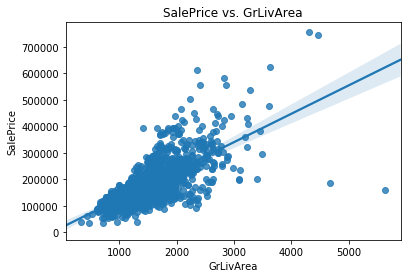

In [7]:
sns.regplot(df['GrLivArea'], df['SalePrice'])
plt.title('SalePrice vs. GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.show()

The plot of SalePrice against GrLivArea shows a strong linear relationship between SalePrice and GrLivArea, where larger GrLivArea are associated with higher SalePrice.

### 3.Partition both GrLivArea and SalePrice data into Train (1100 rows) and Test (360 rows) sets

### 4.Import Linear Regression model from Scikit-Learn
### Training: Fit a Linear Regression model
### Print the coefficients of the Linear Regression model you just fit


### 5.Predict SalePrice for the test dataset using the Linear Regression model, and print out the performance of the model including MAE, MSE and RMSE.

In [8]:
seed = 1234

In [9]:
def linearmodel(x, y = 'SalePrice'):
    X = df[[x]]
    y = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1100, random_state=seed)
   
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("The coefficients of the Linear Regression model: {:.4f}".format(model.coef_[0]))

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("MAE: {:.4f}".format(mae))
    print("MSE: {:.4f}".format(mse))
    print("RMSE: {:.4f}".format(rmse))

In [10]:
linearmodel('GrLivArea')

The coefficients of the Linear Regression model: 107.8217
MAE: 34748.7272
MSE: 2447128591.5745
RMSE: 49468.4606


### 6.Perform all the above steps on “SalePrice” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” one by one to perform individual Linear Regressions. Compare their performance, and determine which model is the best to predict “SalePrice”.

In [11]:
linearmodel('LotArea')

The coefficients of the Linear Regression model: 2.3957
MAE: 52464.6022
MSE: 4923912397.2118
RMSE: 70170.5950


In [12]:
linearmodel('TotalBsmtSF')

The coefficients of the Linear Regression model: 111.2777
MAE: 44024.6001
MSE: 3076825378.6271
RMSE: 55469.1390


In [13]:
linearmodel('GarageArea')

The coefficients of the Linear Regression model: 233.0055
MAE: 39601.6926
MSE: 3029157197.7404
RMSE: 55037.7797


The performance of the model using feature 'GrLivArea' is the best, since its MAE, MSE and RMSE are all the lowest.  
Therefore, the model using feature 'GrLivArea' is the best to predict 'SalePrice'.

### 7.Note that LinearRegression() model can take more than one variables to model the dependent/target variable. Use this feature to fit a Linear Regression model to predict “SalePrice” using all the four variables “GrLivArea”, “LotArea”, “TotalBsmtSF”, and “GarageArea”. Print out their coefficients.

In [14]:
def linearmodels(x, y = 'SalePrice'):
    X = df[x]
    y = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1100, random_state=seed)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("The coefficients of the Linear Regression model:")
    for feature, coef in zip(x, model.coef_):
        print(f"{feature}: {coef:.4f}")
        
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("MAE: {:.4f}".format(mae))
    print("MSE: {:.4f}".format(mse))
    print("RMSE: {:.4f}".format(rmse)) 

In [15]:
linearmodels(x = ['GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageArea'])

The coefficients of the Linear Regression model:
GrLivArea: 68.8717
LotArea: 0.0779
TotalBsmtSF: 47.0245
GarageArea: 106.3886
MAE: 26609.4398
MSE: 1511220759.9250
RMSE: 38874.4230


### 8.Perform feature selection, to choose a best set (among the above four variables) of features to fit a regression model for predicting SalePrice. 

In [16]:
X = df[['GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageArea']]
y = df[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1100, random_state=seed)

#### Correlation Matrix   
The correlation matrix reveals that the variables GrLivArea, TotalBsmtSF, GarageArea, and SalePrice exhibit strong correlations, each exceeding 0.6. This indicates a significant positive relationship among these features.

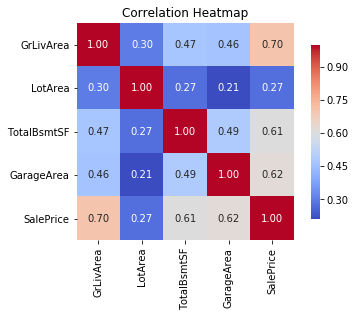

In [17]:
train_df = pd.concat([X_train, y_train],axis=1)
correlation_matrix = train_df.corr()

ax = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Heatmap')
plt.show()

#### SelectKBest   
Using ANOVA F-values to select the top 3 features that are most strongly correlated with the target variable.

In [18]:
selector = SelectKBest(score_func=f_classif, k=3)
selector.fit(X_train, y_train)

C:\Users\24670\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=3)

In [19]:
selected_features_kbest = X_train.columns[selector.get_support()]
selected_features_kbest

Index(['GrLivArea', 'LotArea', 'GarageArea'], dtype='object')

#### Stepwise Selection   
Combining forward selection and backward elimination methods to selecting features. It first evaluates each feature's relationship with the target variable, adding features to the best feature list when their p-values fall below the specified threshold(0.01). Then, it checks the p-values of the selected features and removes any feature with a p-value above a different threshold(0.05). 

In [20]:
def stepwise_selection(X, y, threshold_in=0.01, threshold_out=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    
    while initial_features:
        changed = False
        
        # Forward selection
        excluded = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        min_pval = new_pval.min()
        if min_pval < threshold_in:
            best_features.append(new_pval.idxmin())
            changed = True
            print(f'Add {new_pval.idxmin()} with p-value {min_pval:.6f}')
        
        # Backward elimination
        if best_features:
            model = sm.OLS(y, sm.add_constant(X[best_features])).fit(disp=0)
            pvalues = model.pvalues.iloc[1:]  # exclude the intercept
            max_pval = pvalues.max()
            if max_pval > threshold_out:
                changed = True
                worst_feature = pvalues.idxmax()
                best_features.remove(worst_feature)
                print(f'Drop {worst_feature} with p-value {max_pval:.6f}')
        
        if not changed:
            break
    
    return best_features


In [21]:
selected_features_stepwise = stepwise_selection(X_train, y_train)

Add GrLivArea with p-value 0.000000
Add GarageArea with p-value 0.000000
Add TotalBsmtSF with p-value 0.000000


C:\Users\24670\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\24670\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\24670\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\24670\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be '

In [22]:
selected_features_stepwise

['GrLivArea', 'GarageArea', 'TotalBsmtSF']

The correlation and stepwise selection method both select 'GrLivArea', 'GarageArea', 'TotalBsmtSF'.

In [23]:
#Fit model using the features 'GrLivArea', 'GarageArea', 'TotalBsmtSF'
linearmodels(x = selected_features_stepwise)

The coefficients of the Linear Regression model:
GrLivArea: 69.1533
GarageArea: 106.5203
TotalBsmtSF: 47.2819
MAE: 26657.2579
MSE: 1519354144.0468
RMSE: 38978.8936


In [24]:
#Fit model using the features 'GrLivArea', 'LotArea', 'GarageArea' selected by SelectKBest method
linearmodels(x = selected_features_kbest)

The coefficients of the Linear Regression model:
GrLivArea: 79.8305
LotArea: 0.3481
GarageArea: 138.6109
MAE: 28908.6877
MSE: 1839563001.8154
RMSE: 42890.1271


The model performance using the features 'GrLivArea', 'GarageArea', and 'TotalBsmtSF' is better than that of the model using 'GrLivArea', 'LotArea', and 'GarageArea'.    
However, the model that incorporates all four features still outperforms the one with 'GrLivArea', 'GarageArea', and 'TotalBsmtSF'.  
So the best set (among the above four variables) of features to fit a regression model for predicting SalePrice is still the combination of all four features: 'GrLivArea', 'GarageArea', 'TotalBsmtSF', and 'LotArea'. 